In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [14]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [16]:
# Function to check if a row satisfies the constraints
def check_constraints(row):
    # Age constraint: age >= 18
    if row['age'] < 18:
        #print(f"Invalid age: {row['age']}")
        return -1
    
    # Balance constraint: balance >= 0
    if row['balance'] < 0:
        return -1
    
    # Estimated Salary constraint: estimated_salary >= 0
    if row['estimated_salary'] < 0:
        return -1
    
    # Credit Score constraint: 300 < credit_score < 850
    if row['credit_score'] < 300 or row['credit_score'] > 850:
        return -1

    # Churn constraint: churn must be either 0 or 1
    if row['churn'] not in [0, 1]:
        return -1
    
    # If all constraints are satisfied, return 1
    return 1

In [17]:
# Apply the constraint check to each row
df['valid'] = df.apply(check_constraints, axis=1)

# Show rows that fail the constraints
invalid_rows = df[df['valid'] == -1]
invalid_rows

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,valid


In [18]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Ground truth: Assume all data points are valid (True)
# y_true = [True] * len(df)

# # Predictions: Based on our constraint checks
# y_pred = df['valid']

# # Calculate metrics
# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a copy of the dataset and randomly mutate 1% of the rows
df_mutated = df.copy()
num_mutations = int(0.01 * len(df))  # Mutate 1% of rows
mutation_indices = np.random.choice(df.index, size=num_mutations, replace=False)

# Mutate by adding large random values
df_mutated.loc[mutation_indices, 'age'] = np.random.uniform(10, 12, size=num_mutations)

# Ground truth: Now, we assume the mutated rows are invalid (-1), others are valid (1)
y_true = np.ones(len(df), dtype=int)  # Default all rows as valid (1)
y_true[mutation_indices] = -1         # Mark mutated rows as invalid (-1)

# Predictions: Based on our constraint checks
y_pred = df_mutated.apply(check_constraints, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [20]:
# Print the first 20 ground truth labels
print(y_true[:20])

# Print the first 20 predicted labels
print(y_pred[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64


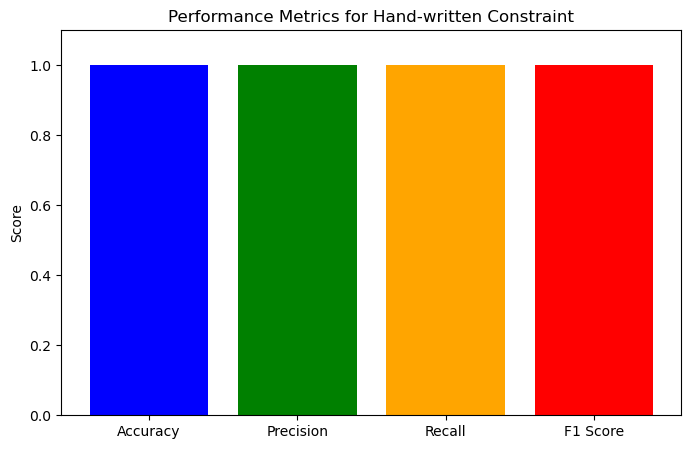

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.title('Performance Metrics for Hand-written Constraint')
plt.ylabel('Score')
plt.show()

Unique values in y_true: [-1  1]
Unique values in y_pred: [-1  1]


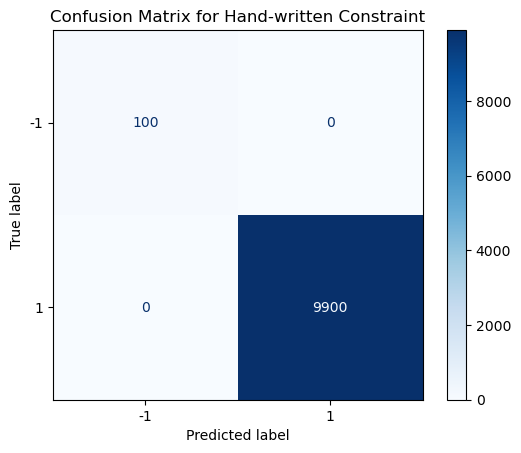

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Check the unique values in y_true and y_pred
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Handle case where only one class is present
if len(np.unique(y_true)) == 1 or len(np.unique(y_pred)) == 1:
    # Only one class in ground truth or predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
else:
    # Both classes are present
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hand-written Constraint')
plt.show()